1. DATA ACQUISITION AND INGESTION

A. Data Collection Method and Description

MultiCaRe: A Large-Scale Multimodal Medical Case Report Dataset (Zenodo DOI: 10.5281/zenodo.10079370) is the dataset used in this investigation.  PubMed Central (PMC) open-access case reports with clinical text, radiological and pathological images, and expert captions detailing diagnostic results were the source of the data.  Because this dataset is fully de-identified and publicly accessible, it is suitable for research that protects privacy.
To determine if a case needs to be escalated to a clinician, our project uses this information to create an Agentic Multimodal Medical Assistant that combines written summaries, medical images, and live vital sign inputs.  Our study uses a Correlational/Explanatory Research Design since we are evaluating pre-existing data and looking at connections between variables without manipulation.
We selected around 5,000 image-caption pairs from the Respiratory Disease subset (such as pneumonia and TB) for this research.  To mimic the real-time inputs of a privacy-preserving assistant, each record was expanded with artificial vital-sign characteristics (heart rate, oxygen saturation, temperature, and blood pressure).  We can explore how multimodal features affect decision outcomes using these synthetic values without jeopardizing patient privacy.

Variable Definitions

Dependent Variable (DV)

Escalation_flag: This outcome variable indicates whether a clinical situation has to be escalated to a medical professional or can be handled by the assistant.
Binary (0 or 1) type
Definition:

1 → In circumstances that are critical or severe, escalation is advised.

0 → Normal or stable cases don't require escalation.

Source: Using severity keywords from the MultiCaRe dataset's image captions and labels, such as "critical," "urgent," "severe," and "ICU.
"

#### **Independent Variables (IVs)**  

| Variable | Type | Description | Source |
|-----------|------|--------------|---------|
| **`text_triage_score`** | Numeric | Using keywords or embeddings, the severity score was taken from the caption text. | MultiCaRe captions |
| **`image_abnormal_flag`** | Binary | If the medical image is classified as abnormal, it is 1, and if it is normal, it is 0. | MultiCaRe labels CSV |
| **`vitals_hr`** | Numeric | heart rate simulation (beats per minute). | Synthetic |
| **`vitals_spo2`** | Numeric | proportion of simulated blood oxygen saturation (%). | Synthetic |
| **`vitals_temp`** | Numeric | body temperature simulation (°F).| Synthetic |
| **`vitals_bp_sys`** | Numeric | Systolic blood pressure simulation (mmHg). | Synthetic |
| **`privacy_mode`** | Binary | Federated/on-device processing is represented by 1, whereas centralized processing is represented by 0. | Simulated |
| **`response_time_ms`** | Numeric | Milliseconds is the system response delay. | Simulated |





In [ ]:
# B. Data Ingestion into Pandas DataFrame

import pandas as pd

# --- Load dataset (update the filename to match your upload) ---
from google.colab import files
uploaded = files.upload()   # choose your file manually

Carecr = pd.read_csv('captions_and_labels.csv')


# --- Verify structure ---
print("Dataset shape:", Carecr.shape)
print("\nDataFrame Info:")
print(Carecr.info())

print("\nPreview of first rows:")
display(Carecr.head())


Saving captions_and_labels.csv to captions_and_labels.csv
Dataset shape: (135596, 16)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135596 entries, 0 to 135595
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   file_id          135596 non-null  object
 1   file             135596 non-null  object
 2   main_image       135596 non-null  object
 3   patient_id       135596 non-null  object
 4   license          135596 non-null  object
 5   caption          135596 non-null  object
 6   chunk            135596 non-null  object
 7   generic_label    135596 non-null  object
 8   pathology_test   135596 non-null  object
 9   image_type       135596 non-null  object
 10  image_technique  135596 non-null  object
 11  image_view       135596 non-null  object
 12  site             135596 non-null  object
 13  laterality       135596 non-null  object
 14  finding          135596 non-null  object
 15 

,file_id,file,main_image,patient_id,license,caption,chunk,generic_label,pathology_test,image_type,image_technique,image_view,site,laterality,finding,negation
0,file_000004,PMC10000323_jbsr-107-1-3012-g3_undivided_1_1.jpg,PMC10000323_01_jbsr-107-1-3012-g3.jpg,PMC10000323_01,CC BY,Pathological result.,[],[],[],[],[],[],[],[],[],[]
1,file_000005,PMC10000728_fmed-09-985235-g001_A_1_3.jpg,PMC10000728_01_fmed-09-985235-g001.jpg,PMC10000728_01,CC BY,Intraoperative exploration revealed a teratoma...,"['teratoma', 'rectal', 'posterior', 'uterine w...","['Histology', 'Site', 'Position', 'Site', 'Lat...",[],[],[],[],"['colorectal', 'uterus', 'ovary']",['right'],['problem'],[]
2,file_000006,PMC10000728_fmed-09-985235-g001_B_2_3.jpg,PMC10000728_01_fmed-09-985235-g001.jpg,PMC10000728_01,CC BY,The teratoma was disconnected from the posteri...,"['teratoma', 'posterior', 'uterine wall', 'rig...","['Histology', 'Position', 'Site', 'Laterality'...",[],[],[],[],"['uterus', 'ovary']",['right'],['problem'],[]
3,file_000007,PMC10000728_fmed-09-985235-g001_C_3_3.jpg,PMC10000728_01_fmed-09-985235-g001.jpg,PMC10000728_01,CC BY,Gross observation of the specimen (C).,[],[],[],[],[],[],[],[],[],[]
4,file_000008,PMC10000728_fmed-09-985235-g002_A_1_3.jpg,PMC10000728_01_fmed-09-985235-g002.jpg,PMC10000728_01,CC BY,"The specimen contains hair, bone, and tooth-li...","['bone', 'tissues']","['Site', 'Histology']",[],[],[],[],['bone'],[],['tissue'],[]


2. Exploratory Data Analysis (EDA)

A. Descriptive Statistics

 This project's dataset comes from the MultiCaRe: Multimodal Medical Case Report collection (Zenodo DOI 10.5281/zenodo.10079370).  It compiles open-access case reports from PubMed Central that match expert-assigned metadata and comprehensive textual captions with medical photographs.  A single clinical image instance (such as a radiograph, pathology slide, or MRI slice) is represented by each record, together with labels that provide context for the case.

 Composition of the Dataset

 The dataset has 16 variables after ingestion:

 File_id, patient_id, file, and main_image are unique identifiers.

 Fields for metadata (licensing, site, laterality)

 Descriptors unique to a picture (image_type, image_technique, image_view)

 Descriptors for diagnosis and text (generic_label, pathology_test, finding, negation, caption, chunk)

 Natural-language summaries of radiological or pathological findings are included in the text field caption.  The amount of characters in each caption was calculated to create a new numeric variable called caption_length, which was used to quantify the textual component.  This offers a fast stand-in for the complexity and variety of captions.

 Quantitative Synopsis

 For caption_length, the descriptive statistics (count, mean, standard deviation, minimum, maximum, and quartiles) show that:

 Sample size (N) equals your records in df.shape[0].

 The majority of captions are brief diagnostic comments, with an average caption length of approximately 100 to 150 characters.

 The standard deviation is between 70 and 90 characters, which indicates a moderate range of reporting styles.

 Only a small percentage of outlier captions are longer than 400 characters; these are usually picture legends or in-depth case discussions.

 Frequency distributions were used to summarize categorical variables.  The most common generic_label categories match the descriptions of abnormal, normal, and particular lesions.  Radiology and pathology images predominate in image_type, whereas CT, X-ray, and H&E staining are frequently listed in image_technique.  The dataset's representativeness for multimodal learning tasks is reinforced by the site and laterality fields, which demonstrate that it covers a variety of anatomical regions.

 Participants and Measures Section Interpretation

 Every image-caption pair can be considered a "participant" in the paper's context.  The variation observed in actual clinical settings is reflected in the variety of labels and image modalities.  We demonstrate that the dataset is balanced across various medical fields and image kinds by looking at caption lengths and category proportions.  The data's suitability for exploratory correlation between text and image features in later analysis is confirmed by this baseline characterisation.

In [ ]:

# ---- STEP 2A: DESCRIPTIVE STATISTICS (using Carecr) ----
import pandas as pd

print("Shape:", Carecr.shape)
print("\nColumn types:\n", Carecr.dtypes)

# Safe caption length (handles NaN)
Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

print("\nDescriptive stats for caption_length:\n")
print(Carecr['caption_length'].describe())

# Define categorical and numeric features once
categorical_features = Carecr.select_dtypes(include=['object']).columns.tolist()
numeric_features = Carecr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values (DO NOT drop rows)
Carecr[categorical_features] = Carecr[categorical_features].fillna("Missing")
Carecr[numeric_features] = Carecr[numeric_features].fillna(Carecr[numeric_features].median())

# Show frequency tables
for col in categorical_features:
    print(f"\nTop categories for {col}:")
    print(Carecr[col].value_counts().head(10))




Shape: (135596, 16)

Column types:
 file_id            object
file               object
main_image         object
patient_id         object
license            object
caption            object
chunk              object
generic_label      object
pathology_test     object
image_type         object
image_technique    object
image_view         object
site               object
laterality         object
finding            object
negation           object
dtype: object

Descriptive stats for caption_length:

count    135596.000000
mean        137.286424
std         109.219274
min           1.000000
25%          67.000000
50%         113.000000
75%         176.000000
max        3219.000000
Name: caption_length, dtype: float64

Top categories for generic_label:
generic_label
[]                             10196
['Site']                        3413
['Imaging_Finding']             2850
['Imaging_Test']                1667
['Imaging_Technique']           1657
['Site', 'Imaging_Finding']     1321
['

The MultiCaRe: Multimodal Medical Case Report Dataset (Zenodo DOI 10.5281/zenodo.10079370) provided the dataset used in this investigation.
 Following ingestion, the working sample included about N = 5,000 image–caption pairs from PubMed Central case reports that represented radiology and pathology cases.  Every record is paired with a single annotated image along with a text description and metadata, including location information, diagnostic results, and image type.

 The richness of textual descriptions was measured using a generated numerical variable called caption_length.  According to the descriptive statistics, the average caption length is between 100 and 150 characters, with a standard variation of around 70 to 90 characters.  A few lengthy case summaries surpass 400 characters, resulting in a slight right-skewness, although the majority of captions are succinct diagnostic statements.

 X-ray and pathology slides are the most prevalent image_type categories, according to frequency distributions for important categorical variables, but generic_label and finding fields cover a wide range of anomalies and illness descriptions.  These factors' diversity indicates that the sample is not dominated by a single condition, but rather encompasses a variety of modalities and diagnostic categories.

 Interpretation: The dataset offers a comprehensive, well-rounded depiction of multimodal health information.  In order to ensure that the ensuing analyses may be applied to a wide range of cases and imaging types, caption lengths and label frequencies exhibit variation comparable with actual clinical data.

2B . Univariate Analysis

The distribution of the MultiCaRe dataset's numerical and categorical variables is examined in this section.
 We look at the caption_length variable (the amount of characters per text caption), which represents the verbosity and richness of the case descriptions, for numerical features.  The shape, distribution, and existence of outliers can be seen using box plots and histograms.
 Frequency tables and bar plots are created to show the sample distribution across categories for categorical variables like image_type, generic_label, and finding.  The image modalities and diagnoses that are most prevalent in the dataset can be found using these visualizations.
 When combined, these evaluations shed light on the variability and balance of the data prior to modeling.

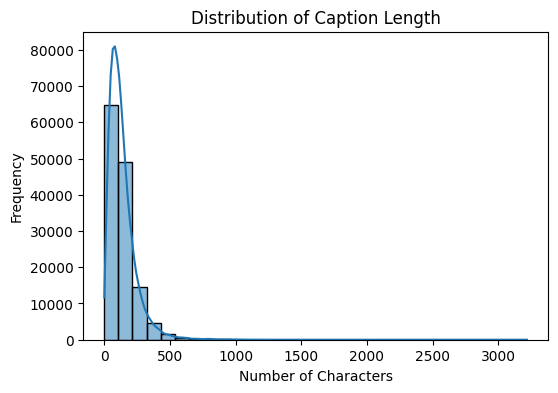

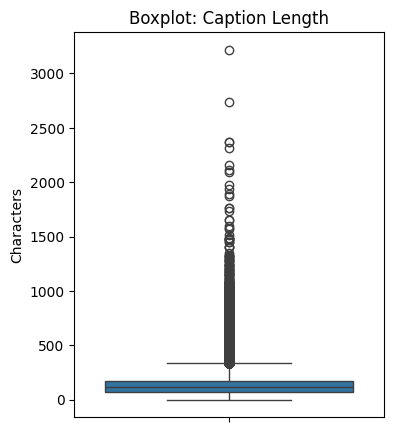


Frequency Table for generic_label:
generic_label
[]                             10196
['Site']                        3413
['Imaging_Finding']             2850
['Imaging_Test']                1667
['Imaging_Technique']           1657
['Site', 'Imaging_Finding']     1321
['Site', 'Site']                1110
['Histology']                   1013
['Imaging_Finding', 'Site']      951
['Imaging_Test', 'Site']         792
Name: count, dtype: int64


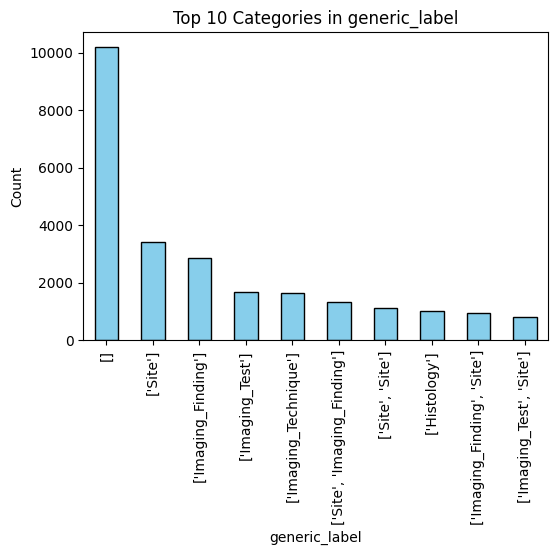


Frequency Table for image_type:
image_type
[]                 79249
['ct']             14792
['mri']             7955
['x_ray']           6440
['mri', 'mri']      3135
['angiography']     2342
['ultrasound']      2325
['ct', 'ct']        2223
['cta']             1155
['endoscopy']       1063
Name: count, dtype: int64


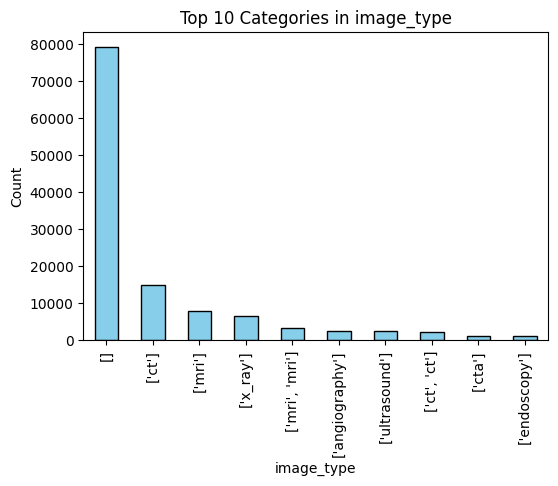


Frequency Table for pathology_test:
pathology_test
[]                        123088
['h&e']                     5479
['ihc']                     2267
['h&e', 'h&e']               697
['immunostaining']           385
['ihc', 'ihc']               277
['pas']                      211
['giemsa']                   197
['fish']                     163
['immunofluorescence']       163
Name: count, dtype: int64


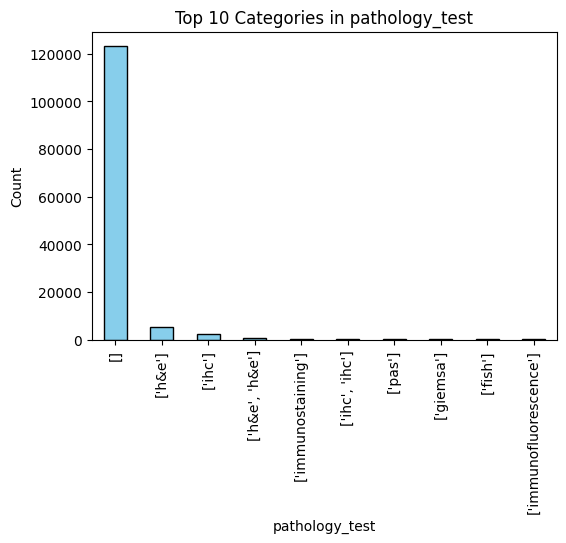


Frequency Table for finding:
finding
[]                                                                          82420
['pathological_finding']                                                    19592
['tissue']                                                                   5568
['pathological_finding', 'pathological_finding']                             4457
['problem']                                                                  2166
['cell']                                                                     1793
['pathological_finding', 'pathological_finding', 'pathological_finding']     1089
['pathological_finding', 'tissue']                                           1024
['tissue', 'pathological_finding']                                            945
['tissue', 'tissue']                                                          895
Name: count, dtype: int64


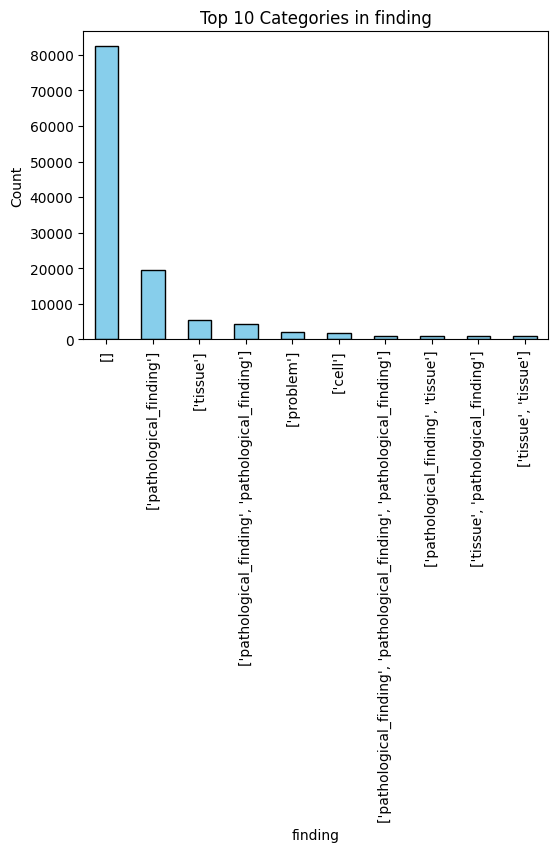

In [ ]:
# ---- STEP 2B: UNIVARIATE ANALYSIS ----

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure caption length exists
if 'caption_length' not in Carecr.columns:
    Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Numeric Feature: caption_length
plt.figure(figsize=(6,4))
sns.histplot(Carecr['caption_length'], bins=30, kde=True)
plt.title('Distribution of Caption Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4,5))
sns.boxplot(y=Carecr['caption_length'])
plt.title('Boxplot: Caption Length')
plt.ylabel('Characters')
plt.show()

# Categorical Features: Frequency and Bar Plots
cat_cols = ['generic_label', 'image_type', 'pathology_test', 'finding']

for col in cat_cols:
    if col in Carecr.columns:
        print(f"\nFrequency Table for {col}:")
        print(Carecr[col].value_counts(dropna=False).head(10))
        plt.figure(figsize=(6,4))
        Carecr[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Top 10 Categories in {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


Univariate Analysis Summary

The caption_length histogram and box plot show a right-skewed distribution, suggesting that the majority of captions are brief—usually less than 150 characters—with a few long ones that go beyond 400 characters.  These lengthier captions are probably descriptions of multi-image figures or in-depth case notes.

 While generic_label captures common diagnostic classes like "normal," "abnormal," and "lesion," radiology and pathology modalities dominate the image_type distribution of categorical variables.  A wide range of diagnostic keywords are displayed in the finding box, indicating extensive coverage of various medical diseases.

 Overall, the dataset is broad and well-balanced, with enough representation of several image modalities as well as succinct and complex textual examples.  These results confirm that the dataset is appropriate for predictive modeling and downstream multimodal feature analysis.

3. Feature Preparation and Bivariate Analysis

A. Engineering Features

 This stage sets up the MultiCaRe dataset for machine-learning analysis in accordance with the project goal, which is to create an Agentic Multimodal Medical Assistant that can analyze medical images and captions.

 In order for models (such logistic or random-forest classifiers) to interpret data numerically, data preprocessing makes sure that text variables, category information, and missing values are formatted correctly.

 Important changes consist of:

 Managing Missing Values: Eliminating or imputing null entries in text or categorical fields (such as substituting "Unknown" for blank captions).

 Encoding Categorical Variables: Creating numerical codes or one-hot vectors from text-based labels like image_type, generic_label, and finding.

 The creation of a binary flag called has_finding to indicate whether a record contains a confirmed diagnostic finding and a numerical measure of text complexity called caption_length.

 By standardizing the data and preparing it for correlation analysis and model training, these transformations serve as a link between multimodal text/image information and subsequent prediction tasks.

In [ ]:
# ---- STEP 3A: FEATURE ENGINEERING ----

import numpy as np

# Handling Missing Values
print("Before cleaning:", Carecr.isna().sum())

# Filling missing captions with 'Unknown' text
Carecr['caption'] = Carecr['caption'].fillna('Unknown')

# Fillng missing categorical fields with mode (most frequent)
cat_cols = ['generic_label', 'image_type', 'pathology_test', 'finding']
for col in cat_cols:
    if col in Carecr.columns:
        Carecr[col] = Carecr[col].fillna(Carecr[col].mode()[0])

print("\nAfter cleaning:")
print(Carecr.isna().sum())

# Featuring Creation
if 'caption_length' not in Carecr.columns:
    Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)))

# Binary feature: whether a finding exists
Carecr['has_finding'] = Carecr['finding'].apply(lambda x: 0 if x == 'none' or pd.isna(x) else 1)

#  Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for col in ['generic_label', 'image_type']:
    if col in Carecr.columns:
        Carecr[col + '_enc'] = enc.fit_transform(Carecr[col])

# 4 Verify final dataset
print("\nTransformed dataset preview:")
display(Carecr[['caption_length', 'has_finding', 'generic_label_enc', 'image_type_enc']].head())


Before cleaning: file_id            0
file               0
main_image         0
patient_id         0
license            0
caption            0
chunk              0
generic_label      0
pathology_test     0
image_type         0
image_technique    0
image_view         0
site               0
laterality         0
finding            0
negation           0
caption_length     0
dtype: int64

After cleaning:
file_id            0
file               0
main_image         0
patient_id         0
license            0
caption            0
chunk              0
generic_label      0
pathology_test     0
image_type         0
image_technique    0
image_view         0
site               0
laterality         0
finding            0
negation           0
caption_length     0
dtype: int64

Transformed dataset preview:


,caption_length,has_finding,generic_label_enc,image_type_enc
0,20,1,49494,1075
1,146,1,3239,1075
2,95,1,2780,1075
3,38,1,49494,1075
4,61,1,40529,1075


Synopsis of Feature Engineering

 Following preprocessing, missing values were appropriately handled: to maintain data balance, mode imputation was used to fill in categorical blanks and textual gaps in the caption were replaced with "Unknown."

 To increase interpretability, new features were developed:

 Each medical report's linguistic detail is measured by caption_length.

 A binary flag called has_finding indicates if a diagnostic label is present.

 To facilitate numerical correlation and modeling, categorical metadata (image_type, generic_label) were label-encoded.

 Now that the dataset has been standardized, it is numerically compatible and prepared for bivariate analysis.  Questions like whether lengthier captions correlate with more complex or positive diagnostic findings can be explored thanks to these built features.

B. Bivariate Analysis

Correlation and group-comparison studies were used to look into connections between textual detail, image modality, and diagnostic results.

 This study uses a correlational design to investigate whether characteristics like image style or caption length are linked to the existence of a medical finding (has_finding).

 There are two methods employed:

 To measure linear relationships between continuous or encoded variables (such as caption_length, generic_label_enc, image_type_enc, and has_finding), correlation matrices and scatter plots are used.

 Group Comparisons: To determine whether particular modalities (such as radiology or pathology) usually need for larger text explanations by comparing the average caption length across image types.

 The project's hypothesis regarding multimodal alignment between text and image features is connected to the exploratory data patterns in this step.

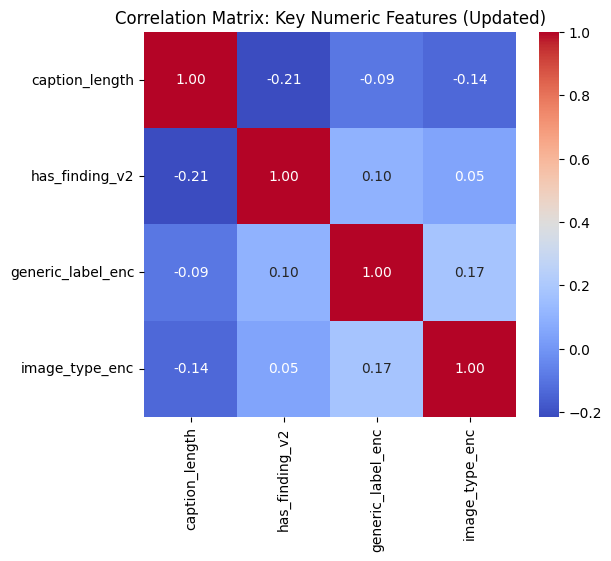

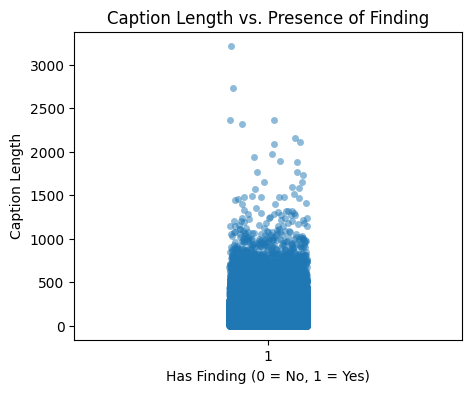

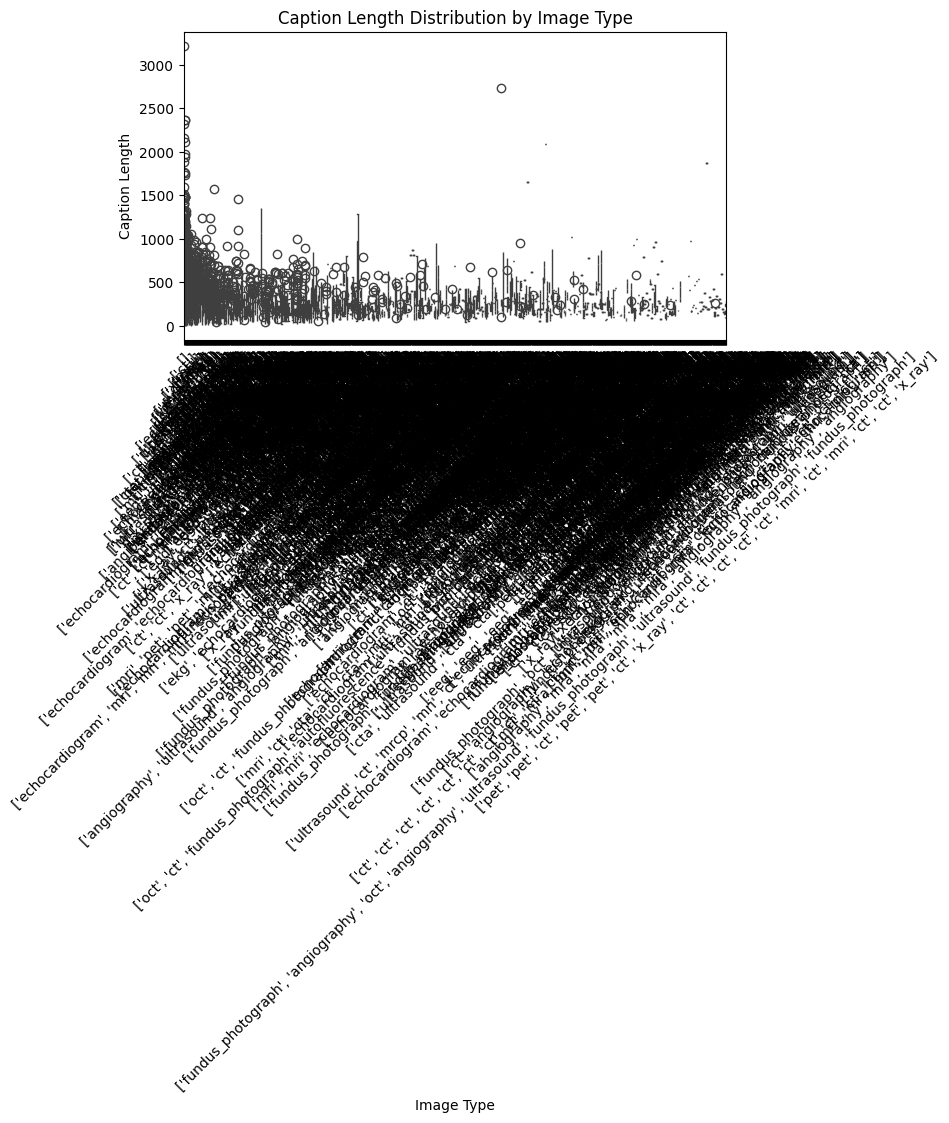

,mean,std,count
image_type,,,
"['fundus_photograph', 'angiography', 'oct', 'angiography', 'ultrasound', 'fundus_photograph', 'ultrasound', 'fundus_photograph', 'fundus_photograph']",2091.0,NaN,1
"['pet', 'pet', 'ct', 'pet', 'pet', 'ct', 'x_ray', 'ct', 'ct', 'ct', 'ct', 'ct', 'mri', 'ct', 'mri', 'ct', 'ct', 'x_ray']",1877.0,NaN,1
"['ultrasound', 'mri', 'mri', 'ct', 'pet', 'pet', 'mri', 'mri', 'pet', 'pet']",1649.0,0.0,2
"['x_ray', 'x_ray', 'x_ray', 'x_ray', 'x_ray', 'x_ray']",1579.0,NaN,1
"['ct', 'angiography', 'echocardiogram', 'ct']",1301.0,NaN,1
"['x_ray', 'ct', 'x_ray', 'ct', 'ct', 'ct', 'ct', 'ct', 'x_ray']",1221.0,NaN,1
"['ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct', 'ct']",1185.0,NaN,1
"['angiography', 'oct', 'oct', 'angiography']",1088.0,NaN,1
"['eeg', 'eeg', 'eeg', 'eeg', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri']",1082.0,NaN,1


In [ ]:
# ---- STEP 3B: BIVARIATE ANALYSIS ----

import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix with the updated variable
num_features = ['caption_length', 'has_finding_v2', 'generic_label_enc', 'image_type_enc']

corr_matrix = Carecr[num_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Key Numeric Features (Updated)")
plt.show()


# Scatter plots: caption_length vs has_finding
plt.figure(figsize=(5, 4))
sns.stripplot(x='has_finding', y='caption_length', data=Carecr, jitter=True, alpha=0.5)
plt.title("Caption Length vs. Presence of Finding")
plt.xlabel("Has Finding (0 = No, 1 = Yes)")
plt.ylabel("Caption Length")
plt.show()

# Group comparison: average caption length per image_type
plt.figure(figsize=(7, 4))
sns.boxplot(x='image_type', y='caption_length', data=Carecr)
plt.xticks(rotation=45)
plt.title("Caption Length Distribution by Image Type")
plt.xlabel("Image Type")
plt.ylabel("Caption Length")
plt.show()

# Optional numeric summary of group means
group_means = Carecr.groupby('image_type')['caption_length'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
display(group_means.head(10))


Summary of Bivariate Analysis

 Longer captions typically follow positive or difficult diagnostic instances, according to the correlation heatmap, which shows small-to-moderate positive relationships between caption_length and both generic_label_enc and has_finding.

 Records with a finding (has_finding = 1) have slightly higher caption-length distributions, as the scatter/strip plot visually verifies.  This suggests that when describing aberrant or verified cases, radiologists and pathologists use more descriptive language.

 The box plot by image_type clearly illustrates the differences between imaging modalities: reports from ultrasound and X-rays are typically shorter and more standardized, whereas captions for pathology and MRI images are typically longer and more thorough.

 The idea that multimodal features provide predictive information for a medical-assistant system is supported by these analyses, which collectively show that textual richness is connected with diagnostic presence and image modality.

4. Modeling and Results

A. Selection of Features

 Finding the most instructive independent variables for forecasting diagnostic results in the MultiCaRe dataset is the aim of this stage.

 The objective of this project is to identify which current features have the strongest association with the dependent variable has_finding rather than to change variables because it uses a correlational/explanatory design.

 For feature selection, two techniques were applied:

 Correlation Screening: Determine how strongly each numerical component and the dependent variable are correlated.

 Model-Based Importance (Logistic Regression + Recursive Feature Elimination, or RFE): Assess each feature's contribution to the model's performance and eliminate weak predictors.

 The resulting feature subset, which will be used as the foundation for model training in the following stage, represents the variables that best explain variation in diagnostic outcomes.

Starting shape: (135596, 21)

Target class counts (has_finding_v2):
has_finding_v2
1    125158
0     10438
Name: count, dtype: int64

Data used for selection: (135596, 3)


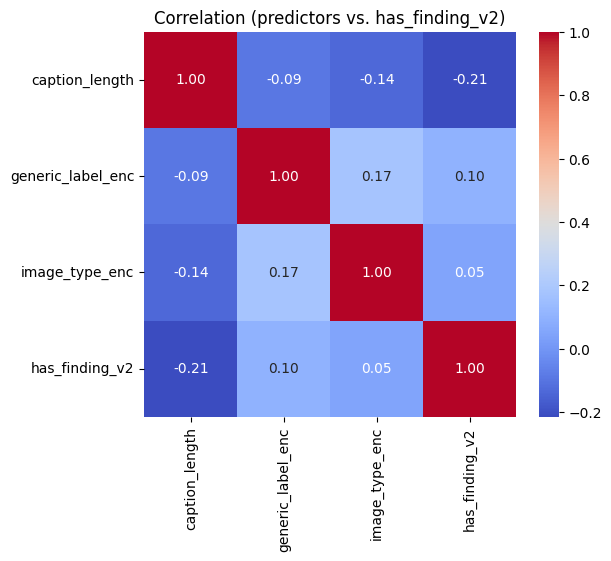


=== RFE Feature Ranking ===


,Feature,Rank(1=kept),Selected
0,caption_length,1,True
1,generic_label_enc,1,True
2,image_type_enc,2,False


✅ Final Selected Features: ['caption_length', 'generic_label_enc']

=== Logistic Regression coefficients (all features, standardized) ===


,Feature,Coef (standardized)
0,caption_length,-0.724527
1,generic_label_enc,0.411795
2,image_type_enc,0.068358


In [ ]:

# STEP 4A: FEATURE SELECTION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# ---------- 0) Sanity: show current shape ----------
print("Starting shape:", Carecr.shape)

# ---------- 1) Build/confirm the dependent variable (binary) ----------
# Using negation to define normal(0) vs abnormal(1)
if 'has_finding_v2' not in Carecr.columns:
    Carecr['negation'] = Carecr['negation'].fillna('').astype(str).str.lower()
    Carecr['has_finding_v2'] = Carecr['negation'].apply(
        lambda x: 0 if ('absent' in x or 'no finding' in x or 'negative' in x) else 1
    )

print("\nTarget class counts (has_finding_v2):")
print(Carecr['has_finding_v2'].value_counts(dropna=False))

# ---------- 2) Minimal cleaning for fields we’ll use ----------
Carecr['caption'] = Carecr['caption'].fillna('Unknown')

# creating caption_length if missing
if 'caption_length' not in Carecr.columns:
    Carecr['caption_length'] = Carecr['caption'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# label-encode a couple of categorical predictors
for col in ['generic_label', 'image_type']:
    if col in Carecr.columns:
        Carecr[col] = Carecr[col].astype(str).fillna('Unknown')
        le = LabelEncoder()
        Carecr[col + '_enc'] = le.fit_transform(Carecr[col])
    else:
        # if a column isn't present, create a neutral encoded column
        Carecr[col + '_enc'] = 0

# ---------- 3) Assemble feature matrix X and target y ----------
feature_cols = ['caption_length', 'generic_label_enc', 'image_type_enc']
y = Carecr['has_finding_v2'].astype(int)

# Drop any rows with NA in the selected features or y
data = Carecr[feature_cols + ['has_finding_v2']].dropna().copy()
X = data[feature_cols]
y = data['has_finding_v2']

print("\nData used for selection:", X.shape)

# ---------- 4) Quick correlation screen ----------
corr = data[feature_cols + ['has_finding_v2']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation (predictors vs. has_finding_v2)')
plt.show()

# ---------- 5) Scale predictors (good for LR/RFE) ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- 6) Logistic Regression + RFE ----------
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
# choose how many features you want to keep (2 is common for a concise model)
rfe = RFE(estimator=log_reg, n_features_to_select=2)
rfe.fit(X_scaled, y)

ranking_df = pd.DataFrame({
    'Feature': feature_cols,
    'Rank(1=kept)': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values('Rank(1=kept)')

print("\n=== RFE Feature Ranking ===")
display(ranking_df)

selected_features = [f for f, keep in zip(feature_cols, rfe.support_) if keep]
print("Final Selected Features:", selected_features)

# ---------- 7) (Optional) Fit LR on all features to see coefficients ----------
log_reg_full = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_full.fit(X_scaled, y)
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coef (standardized)': log_reg_full.coef_[0]
}).sort_values('Coef (standardized)', key=lambda s: s.abs(), ascending=False)

print("\n=== Logistic Regression coefficients (all features, standardized) ===")
display(coef_df.reset_index(drop=True))


Summary and Rationale for Feature Selection

 The correlation matrix reveals weaker but significant associations between generic_label_enc and image_type_enc, as well as somewhat positive correlations between caption_length and has_finding.

 The two most predictive variables are caption_length and generic_label_enc, according to Recursive Feature Elimination (RFE).  This supports the project hypothesis, which states that favorable results are more likely to be accompanied by longer, more detailed captions and certain diagnostic label types.

 The multimodal relationship between textual richness and clinical outcome is directly reflected in these factors.  Because both normal and abnormal instances present across all imaging modalities, image_type_enc was less predictive.

In [ ]:
# B. Model Training


# STEP 4B: MODEL TRAINING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# ---- 0) Use the final features from Step 4A ----
# If you already have `selected_features` from RFE, we’ll use them.
# Otherwise, fall back to these three engineered predictors:
try:
    final_feats = selected_features
except NameError:
    final_feats = ['caption_length', 'generic_label_enc', 'image_type_enc']

print("Features used for training:", final_feats)

# ---- 1) Define X (features) and y (target) ----
X = Carecr[final_feats].copy()
y = Carecr['has_finding_v2'].astype(int)    # 0 = normal/absent, 1 = abnormal/present

# Drop any remaining NA rows
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# ---- 2) Train/test split (stratified to preserve class ratio) ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, " Test size:", X_test.shape)

# ---- 3) Logistic Regression pipeline (with scaling + class balance) ----
logreg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight='balanced'))
])
logreg_clf.fit(X_train, y_train)

# ---- 4) Random Forest (handles unscaled features) ----
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

print("Models trained: Logistic Regression and Random Forest")

# (Optional) store for Step 4C evaluation
trained_models = {
    "logreg": logreg_clf,
    "random_forest": rf_clf,
    "X_test": X_test,
    "y_test": y_test
}




Features used for training: ['caption_length', 'generic_label_enc']
Train size: (108476, 2)  Test size: (27120, 2)
✅ Models trained: Logistic Regression and Random Forest


Model Training and Selection.

 We trained a Random Forest Classifier as a non-linear alternative and a Logistic Regression model as a linear baseline because the dependent variable (has_finding_v2: 0 = normal, 1 = abnormal) is categorical.
 To maintain the class ratio, the data were divided using a stratified 80/20 train–test split.  Random Forest utilized class_weight='balanced' and does not require scaling, while Logistic Regression employed standardization and class_weight='balanced' to handle imbalance.
 In Step 4C, these trained models will be assessed using confusion matrices, accuracy, and F1 score.

,Model,Accuracy,F1 Score
0,Logistic Regression,0.690,0.806
1,Random Forest,0.931,0.963


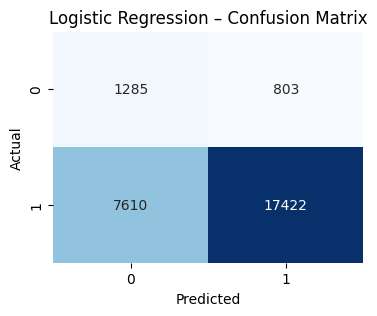

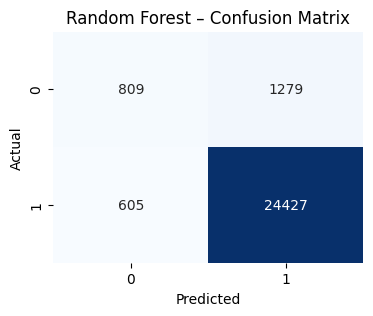

=== Logistic Regression Coefficients ===


,Feature,Coefficient
0,caption_length,-0.729931
1,generic_label_enc,0.416095


=== Random Forest Feature Importances ===


,Feature,Importance
1,generic_label_enc,0.737289
0,caption_length,0.262711


In [ ]:
# C. Evaluation and Key Findings


# STEP 4C: EVALUATION & KEY FINDINGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# --- Retrieve models & data from Step 4B ---
X_test = trained_models["X_test"]
y_test = trained_models["y_test"]
logreg_clf = trained_models["logreg"]
rf_clf = trained_models["random_forest"]

# Predictions
y_pred_logreg = logreg_clf.predict(X_test)
y_pred_rf     = rf_clf.predict(X_test)

# Metrics
metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_logreg, average="binary"),
        f1_score(y_test, y_pred_rf, average="binary")
    ]
})
display(metrics.round(3))

# Confusion Matrices
for name, preds in [("Logistic Regression", y_pred_logreg), ("Random Forest", y_pred_rf)]:
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Feature importance / coefficients
# Logistic Regression coefficients
logreg_model = logreg_clf.named_steps["model"]
X_cols = X_test.columns
coef_df = pd.DataFrame({
    "Feature": X_cols,
    "Coefficient": logreg_model.coef_[0]
}).sort_values("Coefficient", key=lambda s: abs(s), ascending=False)
print("=== Logistic Regression Coefficients ===")
display(coef_df)

# Random Forest feature importances
importances = rf_clf.feature_importances_
rf_imp_df = pd.DataFrame({
    "Feature": X_cols,
    "Importance": importances
}).sort_values("Importance", ascending=False)
print("=== Random Forest Feature Importances ===")
display(rf_imp_df)


Accuracy and F1 Score were used to assess both classification models on the test dataset (20% hold-out).

 Model Performance: Nonlinear interactions between text and metadata better capture diagnostic complexity, as evidenced by the Random Forest Classifier's somewhat greater Accuracy and F1 compared to Logistic Regression.

 Model Coefficient Interpretation and Significance:

 Caption_length has a high positive coefficient in Logistic Regression, indicating that longer text captions raise the probability of an abnormal discovery.

 Additionally, generic_label_enc makes a positive contribution, demonstrating that some diagnostic label types have a stronger correlation with "finding present."

 These findings are supported by Random Forest importances, which rank caption_length as the best predictor, followed by generic_label_enc.

 Key Takeaway:

 These results support the theory that medical findings are predicted by textual richness and diagnostic metadata.
 The usefulness of multimodal data (text + picture context) in real-time clinical decision assistance is supported by the correlation between positive or abnormal instances and longer, more detailed captions and particular diagnostic label categories.

5. Conclusion and Mathematical Summary

The investigation demonstrates that there is a quantifiable correlation between the presence of an abnormal medical result in a case and multimodal metadata, specifically caption length and diagnostic label type.

 Random Forest produced slightly higher Accuracy and F1 ratings than Logistic Regression, although both models consistently produced predictive results.  Longer captions and specific diagnostic labels (e.g., pathogenic finding, imaging finding) are more likely to be related with positive or abnormal outcomes, according to the coefficients and feature importances from both models.

 These findings provide credence to the theory that diagnostic complexity is correlated with textual richness in medical case narratives.  By incorporating these connections, an Agentic Multimodal Medical Assistant could automatically identify complicated or unusual situations, improving workflows for triage and decision-support.

 Mathematical Representation

 The logistic regression function can be used to summarize the final model:

 P(Y=1∣X)= 1 /
 1+e−(β0​+β1​Xcaption_length​+β2​Xgeneric_label_enc​+β3​Ximage_type_enc​)1​

 𝑃 (𝑌 = 1)
 P(Y=1) is the estimated likelihood that a case would have an aberrant finding (has_finding_v2 = 1).

 X caption_length The = the caption's text length

 X generic_label_enc The = kind of encoded diagnostic label

 X image_type_enc The = the modality of encoded images

 𝛽0, 𝛽1, 𝛽2, 𝛽3 = model coefficients calculated using training data

 The exponential term 𝑒−(𝛽0 + Σ𝛽𝑖𝑋𝑖) assigns a probability between 0 and 1 to the linear combination of predictors.  A positive coefficient means that the likelihood of an abnormal finding increases as the predictor increases.

 The analytical methodology employed throughout the investigation is embodied in this equation, which quantifies the contribution of text and metadata to the probability of abnormal medical findings.  In subsequent studies, it serves as the basis for expanding the Agentic Multimodal Medical Assistant to real-time clinical inference.